In [1]:
# Necessary imports
import tensorflow as tf
from sklearn.model_selection import train_test_split 
from tensorflow import keras
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from keras import layers
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, f1_score,classification_report
from keras.applications.resnet import ResNet50
import os
import cv2
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_dir = ('../input/brain-tumor-mri-dataset/Training')
categories = ['glioma', 'meningioma', 'notumor', 'pituitary']
for i in categories:
    path = os.path.join(data_dir, i)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img)) 


In [3]:
path

'../input/brain-tumor-mri-dataset/Training/pituitary'

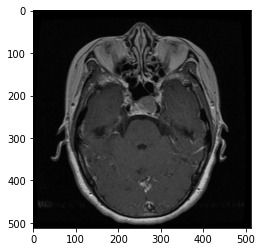

In [4]:
plt.imshow(img_array);

In [5]:
# The image shape.
img_array.shape

(512, 512, 3)

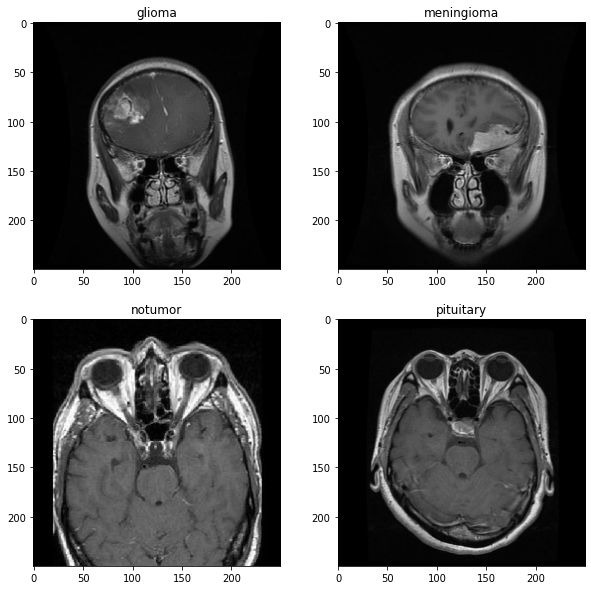

In [6]:
plt.figure(figsize=(10, 10))

images_path = ['/glioma/Tr-glTr_0000.jpg', '/meningioma/Tr-meTr_0000.jpg', '/notumor/Tr-noTr_0000.jpg', '/pituitary/Tr-piTr_0000.jpg']

for i in range(4):
    ax = plt.subplot(2, 2, i + 1)
    img = cv2.imread(data_dir + images_path[i])
    img = cv2.resize(img, (250, 250))
    plt.title(categories[i])
    plt.imshow(img)
    plt.savefig('tumor_fig.png')
   

In [7]:
model.save('/kaggle/working/model/cnn_model.h5')

NameError: name 'model' is not defined

In [8]:
train_data_path = '/kaggle/input/brain-tumor-mri-dataset/Training'

filepaths =[]
labels = []

folds = os.listdir(train_data_path)

for fold in folds:
    f_path = os.path.join(train_data_path , fold)
    filelists = os.listdir(f_path)
    
    for file in filelists:
        filepaths.append(os.path.join(f_path , file))
        labels.append(fold)
        
#Concat data paths with labels
Fseries = pd.Series(filepaths , name = 'filepaths')
Lseries = pd.Series(labels , name = 'label')
train_df = pd.concat([Fseries , Lseries] , axis = 1)

In [9]:
test_data_path = '/kaggle/input/brain-tumor-mri-dataset/Testing'

filepaths =[]
labels = []

folds = os.listdir(test_data_path)

for fold in folds:
    f_path = os.path.join(test_data_path , fold)
    filelists = os.listdir(f_path)
    
    for file in filelists:
        filepaths.append(os.path.join(f_path , file))
        labels.append(fold)
        
#Concat data paths with labels
Fseries = pd.Series(filepaths , name = 'filepaths')
Lseries = pd.Series(labels , name = 'label')
test_df = pd.concat([Fseries , Lseries] , axis = 1)

In [10]:
valid , test = train_test_split(test_df , train_size = 0.5 , shuffle = True , random_state= 42)

In [11]:
# using the ImageDataGenerator

generator_train = ImageDataGenerator(rescale=1./255,
                                    featurewise_center=False,
                                    samplewise_center=False,
                                    featurewise_std_normalization=False,
                                    samplewise_std_normalization=False,
                                    zca_whitening=False,
                                    rotation_range=0,
                                    zoom_range = 0,
                                    width_shift_range=0,
                                    height_shift_range=0,
                                    horizontal_flip=True,
                                    vertical_flip=False)

generator_test = ImageDataGenerator(rescale=1./255,
                                   featurewise_center=False,
                                    samplewise_center=False,
                                    featurewise_std_normalization=False,
                                    samplewise_std_normalization=False,
                                    zca_whitening=False,
                                    rotation_range=0,
                                    zoom_range = 0,
                                    width_shift_range=0,
                                    height_shift_range=0,
                                    horizontal_flip=True,
                                    vertical_flip=False)
generator_valid = ImageDataGenerator(rescale=1./255,
                                   featurewise_center=False,
                                    samplewise_center=False,
                                    featurewise_std_normalization=False,
                                    samplewise_std_normalization=False,
                                    zca_whitening=False,
                                    rotation_range=0,
                                    zoom_range = 0,
                                    width_shift_range=0,
                                    height_shift_range=0,
                                    horizontal_flip=True,
                                    vertical_flip=False)



train_gen = generator_train.flow_from_dataframe(train_df , x_col = 'filepaths' , y_col = 'label', target_size=(200, 200),
                                              batch_size=32, class_mode= "categorical", color_mode='grayscale')

test_gen = generator_test.flow_from_dataframe(test , x_col = 'filepaths' , y_col = 'label', target_size=(200, 200),
                                              batch_size=32, class_mode= "categorical", color_mode='grayscale')
valid_gen=generator_valid.flow_from_dataframe(valid, x_col = 'filepaths' , y_col = 'label', target_size=(200, 200),
                                              batch_size=32, class_mode= "categorical", color_mode='grayscale')


Found 5712 validated image filenames belonging to 4 classes.
Found 656 validated image filenames belonging to 4 classes.
Found 655 validated image filenames belonging to 4 classes.


In [14]:
model = Sequential()

# Convolutional layer 1
model.add(Conv2D(64,(7,7), input_shape=(200, 200, 1), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

#Convolutional layer 2
model.add(Conv2D(128,(7,7), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

# Convolutional layer 3
model.add(Conv2D(128,(7,7), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

# Convolutional layer 4
model.add(Conv2D(256,(7,7), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

 # Convolutional layer 5
model.add(Conv2D(256,(7,7), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

 # Convolutional layer 6
model.add(Conv2D(256,(7,7), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

# Convolutional layer 7
model.add(Conv2D(512,(7,7), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

# Full connect layers

model.add(Dense(units= 1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=4, activation='softmax'))



model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy',
                   metrics= ['accuracy']) 

In [15]:
model_es = EarlyStopping(monitor = 'loss', min_delta = 1e-11, patience = 5, verbose = 1)
model_rlr = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.2, patience = 6, verbose = 1)
model_mcp = ModelCheckpoint(filepath = 'model_weights.h5', monitor = 'val_categorical_accuracy', 
                      save_best_only = True, verbose = 1)

history = model.fit(train_gen, steps_per_epoch=5712//32, epochs=20, validation_data=valid_gen, validation_steps= 655//32,
                     callbacks=[model_es, model_rlr, model_mcp])

Epoch 1/20
178/178 [==============================] - 38s 207ms/step - loss: 0.6115 - accuracy: 0.7676 - val_loss: 1.9340 - val_accuracy: 0.3078
Epoch 2/20
178/178 [==============================] - 33s 187ms/step - loss: 0.3617 - accuracy: 0.8620 - val_loss: 1.0218 - val_accuracy: 0.5688
Epoch 3/20
178/178 [==============================] - 34s 193ms/step - loss: 0.2670 - accuracy: 0.9019 - val_loss: 0.4534 - val_accuracy: 0.8297
Epoch 4/20
178/178 [==============================] - 36s 202ms/step - loss: 0.1770 - accuracy: 0.9379 - val_loss: 0.4832 - val_accuracy: 0.8375
Epoch 5/20
178/178 [==============================] - 36s 201ms/step - loss: 0.1587 - accuracy: 0.9426 - val_loss: 0.1634 - val_accuracy: 0.9266
Epoch 6/20
178/178 [==============================] - 36s 201ms/step - loss: 0.1101 - accuracy: 0.9600 - val_loss: 0.1174 - val_accuracy: 0.9594
Epoch 7/20
178/178 [==============================] - 36s 201ms/step - loss: 0.0889 - accuracy: 0.9657 - val_loss: 0.2793 - val_ac

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 200, 200, 64)      3200      
_________________________________________________________________
batch_normalization_7 (Batch (None, 200, 200, 64)      256       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 100, 100, 64)      0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 100, 100, 128)     401536    
_________________________________________________________________
batch_normalization_8 (Batch (None, 100, 100, 128)     512       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 50, 50, 128)       0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 50, 50, 128)      

In [31]:
model.evaluate(test_gen)

21/21 [==============================] - 3s 117ms/step - loss: 0.6164 - accuracy: 0.8979


[0.6163873076438904, 0.8978658318519592]

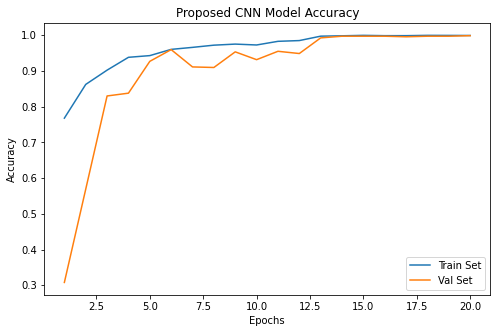

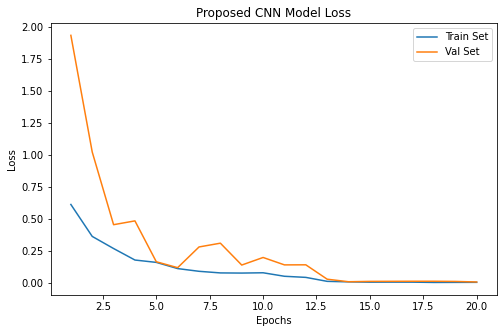

In [27]:
# plot model performance
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(history.epoch) + 1)
val_loss
plt.figure(figsize=(8,5))
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Proposed CNN Model Accuracy')
plt.savefig('acc.png')
plt.show()
plt.figure(figsize=(8,5))
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Proposed CNN Model Loss')
plt.savefig('loss.png')
plt.show()

In [28]:
model.evaluate(train_gen)

179/179 [==============================] - 17s 94ms/step - loss: 0.0014 - accuracy: 0.9995


[0.001390949240885675, 0.9994747638702393]

In [30]:
X_test, y_test = next(test)
X_test.shape

TypeError: 'DataFrame' object is not an iterator

In [31]:
import numpy as np

In [32]:
all_pred = []
all_true = []

# Assuming `test` is an image generator or a dataset generator
# Iterate through the generator to process all images
for i in range(21):  # Replace `total_iterations` with the actual number of iterations needed
    X_test, y_test = next(test_gen)
    pred = model.predict(X_test)

    pred = np.argmax(pred, axis=1)
    y_test_new = np.argmax(y_test, axis=1)

    # Append predictions and true labels to the respective lists
    all_pred.extend(pred)
    all_true.extend(y_test_new)

# Calculate the classification report using all predictions and true labels
print(classification_report(all_true, all_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       149
           1       0.97      0.97      0.97       148
           2       0.99      1.00      1.00       208
           3       0.99      0.99      0.99       151

    accuracy                           0.99       656
   macro avg       0.99      0.99      0.99       656
weighted avg       0.99      0.99      0.99       656



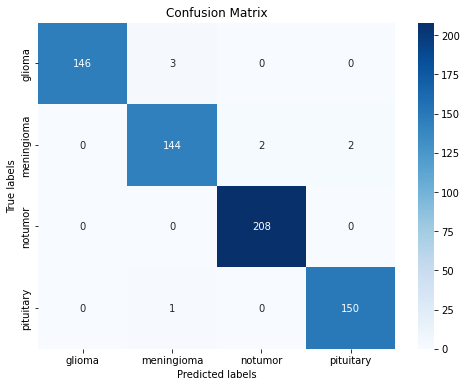

In [34]:
conf_matrix = confusion_matrix(all_true, all_pred)
categories = ['glioma', 'meningioma', 'notumor', 'pituitary']
# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=categories, yticklabels=categories)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.savefig('cm.png')
plt.show()